In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib
import torch

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('lines', linewidth=3, color='g')
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams["xtick.major.size"] = 6
matplotlib.rcParams["ytick.major.size"] = 6
matplotlib.rcParams["ytick.major.width"] = 2
matplotlib.rcParams["xtick.major.width"] = 2
matplotlib.rcParams['text.usetex'] = False

### Download required data 

In [ ]:
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/amino_acid.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/ba_train.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/ba_holdout.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/el_train.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/amino_acids.npy

--2022-05-03 18:52:05--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/amino_acid.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8966 (8.8K) [text/plain]
Saving to: ‘amino_acid.csv’

amino_acid.csv      100%[===================>]   8.76K  --.-KB/s    in 0s      

2022-05-03 18:52:05 (54.6 MB/s) - ‘amino_acid.csv’ saved [8966/8966]

--2022-05-03 18:52:05--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps2-MHC/data/ba_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

## <center>Problem 1: Modeling Binding Affinity</center>

### 1.1 (10 points) Encoding amino acids into feature vectors

In [ ]:
########### Code #############

ba_df = pd.read_csv("ba_train.csv") # read data 
amino_acids = np.load('./amino_acids.npy') # Read all amino acids 

# Your code to featurize amino acids
X = []
y = []

lb = preprocessing.LabelBinarizer()
lb.fit(amino_acids)

for i, row in ba_df.iterrows():   # iterate through each row in the df
  peptide = []
  for aa in row['Peptide']:     # iterate through each amino acid in the peptide sequence and append to peptide (list)
    peptide.append(aa)
  transf_peptide = lb.transform(peptide).tolist()  # label binarizer of amino acids

  peptide_vector = []
  for arr in transf_peptide:
    peptide_vector.extend(arr)
  
  # append individual datapoints to X and y arrays  
  X.append(peptide_vector)
  y.append(row['Binding Affinity'])

X = np.asarray(X)
y = np.asarray(y)
X, y
########### Code #############

(array([[1, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([0.0846866, 0.0846866, 0.0846866, ..., 0.01     , 0.01     ,
        0.01     ]))

### 1.2 (5 points) Modeling with ridge regression

Ridge Regression training R^2 score: 0.67
Ridge Regression testing R^2 score: 0.58


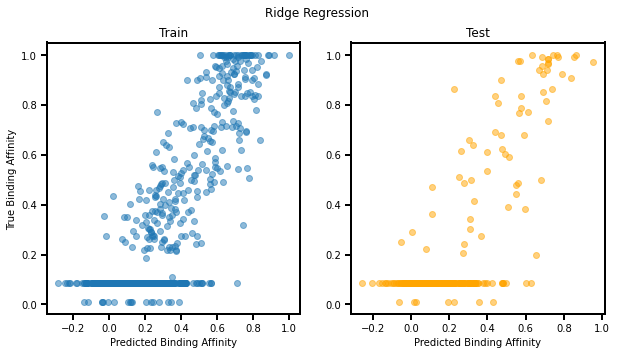

In [ ]:
########### Code #############
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train Ridge Regressor
clf = Ridge().fit(X_train, y_train)

# Test
train_prediction = clf.predict(X_train)
train_truth = y_train

test_prediction = clf.predict(X_test)
test_truth = y_test

# Code snippet to generate scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(train_prediction, train_truth, label='Train', alpha=0.5)
ax[1].scatter(test_prediction, test_truth, label='Test', alpha=0.5, c='orange')

ax[0].set_ylabel("True Binding Affinity")
ax[0].set_xlabel("Predicted Binding Affinity")
ax[1].set_xlabel("Predicted Binding Affinity")
ax[0].set_title('Train')
ax[1].set_title('Test')
fig.suptitle('Ridge Regression')

print("Ridge Regression training R^2 score: {:.2f}".format(clf.score(X_train, y_train)))
print("Ridge Regression testing R^2 score: {:.2f}".format(clf.score(X_test, y_test)))

########### Code #############

### 1.3 (10 points) Modeling with a multi-layer perceptron

MLP Regression training R^2 score: 0.97
MLP Regression testing R^2 score: 0.69


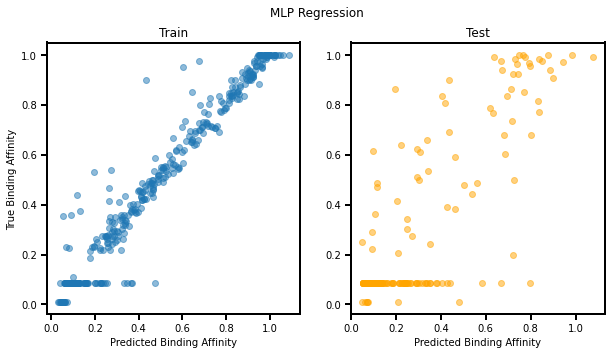

In [ ]:
########### Code #############
# Fit
regr = MLPRegressor(hidden_layer_sizes=(512,256,128), activation='relu', alpha=0.08, solver='adam', early_stopping=True).fit(X_train, y_train)

# Test
train_prediction = regr.predict(X_train)
train_truth = y_train

test_prediction = regr.predict(X_test)
test_truth = y_test

# Code snippet to generate scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(train_prediction, train_truth, label='Train', alpha=0.5)
ax[1].scatter(test_prediction, test_truth, label='Test', alpha=0.5, c='orange')

ax[0].set_ylabel("True Binding Affinity")
ax[0].set_xlabel("Predicted Binding Affinity")
ax[1].set_xlabel("Predicted Binding Affinity")
ax[0].set_title('Train')
ax[1].set_title('Test')
fig.suptitle('MLP Regression')

print("MLP Regression training R^2 score: {:.2f}".format(regr.score(X_train, y_train)))
print("MLP Regression testing R^2 score: {:.2f}".format(regr.score(X_test, y_test)))

########### Code #############

Calculate the total of number of parameters in your MLP model. What does the input hidden_layers_sizes = (512, 256, 128) mean? 

In [ ]:
########## Answer ############

param_count = (180*512+512)+(512*256+256)+(256*128+128)+(128*1+1)
print("Total number of parameters:", param_count)

'''
hidden_layer_sizes=(512, 256, 128) means that our input layer (size 180) is connected to 3 hidden layers that contain 512, 256, and 128 perceptrons respectively.
And the last hidden layer is connected to our output layer (molecular binding prediction).
'''

########## Answer ############

Total number of parameters: 257025


'\nhidden_layer_sizes=(512, 256, 128) means that our input layer (size 180) is connected to 3 hidden layers that contain 512, 256, and 128 perceptrons respectively.\nAnd the last hidden layer is connected to our output layer (molecular binding prediction).\n'

### 1.4 (3 points) Chemical transferability of one-hot representations

MLP validation R^2 score: -0.09
Ridge validation R^2 score: 0.04


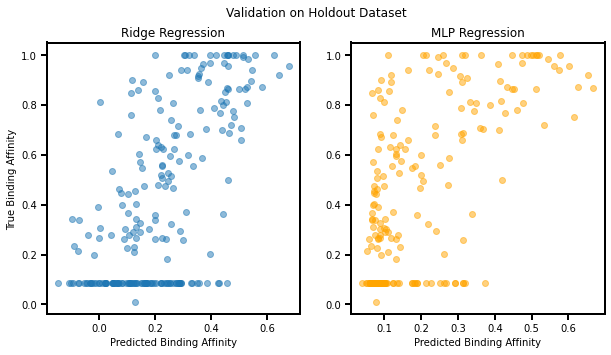

In [ ]:
########### Code #############

# Load the holdout dataset which contains amino acids not seen in the training data
ba_holdout = pd.read_csv("ba_holdout.csv") 

# Your code to featurize amino acids
X_holdout = []
y_holdout = []

lb = preprocessing.LabelBinarizer()
lb.fit(amino_acids)

for i, row in ba_holdout.iterrows():   # iterate through each row in the df
  peptide = []
  for aa in row['Peptide']:     # iterate through each amino acid in the peptide sequence and append to peptide (list)
    peptide.append(aa)
  transf_peptide = lb.transform(peptide).tolist()  # label binarizer of amino acids

  peptide_vector = []
  for arr in transf_peptide:
    peptide_vector.extend(arr)
  
  # append individual datapoints to X and y arrays  
  X_holdout.append(peptide_vector)
  y_holdout.append(row['Binding Affinity'])

X_holdout = np.asarray(X_holdout)
y_holdout = np.asarray(y_holdout)

# Validation
ridge_prediction = clf.predict(X_holdout)
mlp_prediction = regr.predict(X_holdout)

# Code snippet to generate scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(ridge_prediction, y_holdout, label='Ridge Regression', alpha=0.5)
ax[1].scatter(mlp_prediction, y_holdout, label='MLP Regression', alpha=0.5, c='orange')

ax[0].set_ylabel("True Binding Affinity")
ax[0].set_xlabel("Predicted Binding Affinity")
ax[1].set_xlabel("Predicted Binding Affinity")
ax[0].set_title('Ridge Regression')
ax[1].set_title('MLP Regression')
fig.suptitle('Validation on Holdout Dataset')

print("MLP validation R^2 score: {:.2f}".format(regr.score(X_holdout, y_holdout)))
print("Ridge validation R^2 score: {:.2f}".format(clf.score(X_holdout, y_holdout)))
########### Code #############

Comment on your validation results and briefly explain.

In [ ]:
########## Answer ############

'''
Both Ridge validation and MLP Validation R^2 score were low, but the MLP R^2 was lower. This may be because one-hot encoding of amino acid letters
isn't good featurization to train on if our training data hasn't seen it before. As mentioned, the holdout set contains new amino acids not found in the training set.
In addition, the reason for the lower MLP validation score is because it's a more complex model with more trainable parameters, causing overfitting, especially
if our data has high variance and low bias. As a result, it does not generalize well to our holdout data.
'''

########## Answer ############

### 1.5 (5 points) Featurize amino acids with physical descriptors

Training R^2 score: 0.97
Testing R^2 score: 0.75


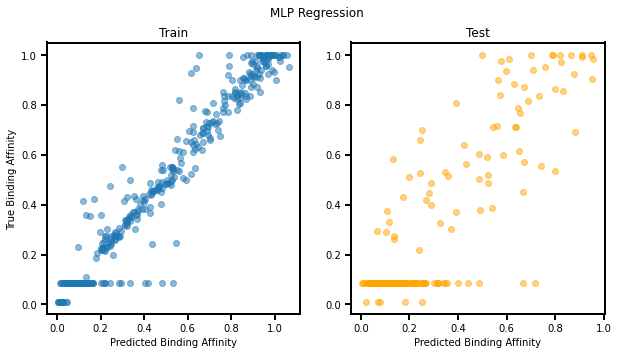

In [ ]:
########### Code #############

amino_acid_df = pd.read_csv("amino_acid.csv")
amino_acid_df = amino_acid_df.set_index('Amino Acids')

# Your code to featurize amino acids
X2 = []
y2 = []

for i, row in ba_df.iterrows():   # iterate through each row in the df
  peptide_features = []
  for aa in row['Peptide']:     # iterate through each amino acid in the peptide sequence and find their associated features
    peptide_features.extend(amino_acid_df.loc[[aa]].values[0].tolist())  # append numberical features of the specific amino acid from amino_acid_df
  
  X2.append(peptide_features)
  y2.append(row['Binding Affinity'])

X2 = np.asarray(X2)
y2 = np.asarray(y2)


# Train-test split, scale, and fit
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
scaler = preprocessing.StandardScaler().fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)
regr = MLPRegressor(hidden_layer_sizes=(512,256,128), activation='relu', alpha=0.08, solver='adam', early_stopping=True).fit(X2_train_scaled, y2_train)

# Test
train_prediction = regr.predict(X2_train_scaled)
train_truth = y2_train

test_prediction = regr.predict(X2_test_scaled)
test_truth = y2_test

# Code snippet to generate scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(train_prediction, train_truth, label='Train', alpha=0.5)
ax[1].scatter(test_prediction, test_truth, label='Test', alpha=0.5, c='orange')

ax[0].set_ylabel("True Binding Affinity")
ax[0].set_xlabel("Predicted Binding Affinity")
ax[1].set_xlabel("Predicted Binding Affinity")
ax[0].set_title('Train')
ax[1].set_title('Test')
fig.suptitle('MLP Regression')


print("Training R^2 score: {:.2f}".format(regr.score(X2_train_scaled, y2_train)) )
print("Testing R^2 score: {:.2f}".format(regr.score(X2_test_scaled, y2_test)) )


########### Code #############

### 1.6 (5 points) Chemical transferability of physical descriptors 

MLP holdout R^2 score: 0.17


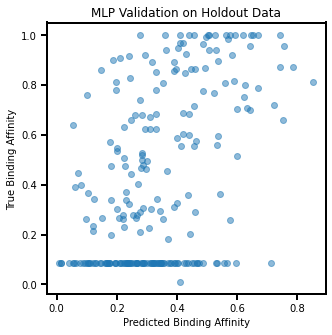

In [ ]:
########### Code #############

# For the holdout set, encode features with the amino acid descriptor 
# Your code to featurize amino acids
X2_holdout = []
y2_holdout = []

for i, row in ba_holdout.iterrows():   # iterate through each row in the df
  peptide_features = []
  for aa in row['Peptide']:     # iterate through each amino acid in the peptide sequence and find their associated features
    peptide_features.extend(amino_acid_df.loc[[aa]].values[0].tolist())  # append numberical features of the specific amino acid from amino_acid_df
  
  X2_holdout.append(peptide_features)
  y2_holdout.append(row['Binding Affinity'])

X2_holdout = np.asarray(X2_holdout)
y2_holdout = np.asarray(y2_holdout)

# Scale and validate
X2_holdout_scaled = scaler.transform(X2_holdout)
prediction = regr.predict(X2_holdout_scaled)

# Code snippet to generate scatter plot 
plt.figure(figsize=(5, 5))
plt.scatter(prediction, y2_holdout, alpha=0.5)

plt.ylabel("True Binding Affinity")
plt.xlabel("Predicted Binding Affinity")
plt.title('MLP Validation on Holdout Data')

print("MLP holdout R^2 score: {:.2f}".format(regr.score(X2_holdout_scaled, y2_holdout)))

########### Code #############

Briefly comment on your validation performance and explain why.

In [ ]:
########## Answer ############

'''
There was an improvement from the previous one-hot representation MLP validation. This is because our physical descriptors' numerical
values can be generalized to different amino acids in the holdout data, if the values are similar, even if they weren't found
initially in our training set. Versus in the one-hot encoding, the data can not be learned from the binary values if they are not present.
'''

########## Answer ############

## <center>Problem 2: Hyperparameter Tuning and Modeling Eluted Ligand Data</center>

### 2.1 (15 points) Optimize neural network architectures with HyperOpt

In [ ]:
########### Code #############

from hyperopt import hp
from hyperopt import fmin, tpe, space_eval, Trials
from sklearn.model_selection import cross_val_score

# Stack train and holdout set together
X_all_train = np.asarray(X_train.tolist() + X_holdout.tolist())
y_all_train = np.concatenate((y_train, y_holdout), axis=None)

def hyperoptoutput2param(best):
    
    '''Change hyperopt output to dictionary with values '''
    
    for key in best.keys():
        if key in hyper_dict.keys():
            best[key] = hyper_dict[key][ best[key] ] 
            
    return best

# Define a dictionary for each parameter range 


hyper_dict = {
    "hidden_layers": [(512, 256, 128), (256, 128, 64), (512, 512, 256), (256, 256, 256)],
    "optimizer": ['sgd', 'adam'],
    "activation": ['relu', 'tanh'],
    "alpha":[0.08, 0.16, 0.32, 0.64]
}

parameter_space =  { "hidden_layers": hp.choice("hidden_layers", hyper_dict['hidden_layers']),
            "optimizer": hp.choice("optimizer", hyper_dict['optimizer']), 
            "activation": hp.choice("activation", hyper_dict['activation']), 
            "alpha": hp.choice("alpha", hyper_dict['alpha'])
                    }

# Evaluation function 
# args should be a dict, with keys for number of hidden layers, optimizer, activation, and alpha
def model_eval(args):

    '''Take suggested arguments and perform model evaluation'''

    # your code here to train MLPRegressors and to run CV score on the training data 
    model = MLPRegressor(hidden_layer_sizes=args["hidden_layers"], solver=args["optimizer"], activation=args["activation"], alpha=args["alpha"], early_stopping=False)
    
    # return the negative of the CV score to ensure we maximize R^2 by minimizing the loss
    cv_score = np.mean(cross_val_score(model, X_all_train, y_all_train, scoring='r2', cv=5))
    return -cv_score


print("Start trials") 

trials = Trials()
best = fmin(model_eval, parameter_space, algo=tpe.suggest, max_evals=40, trials=trials) # this will take a while to run 
best = hyperoptoutput2param(best)

print("Best parameter set: {}".format(best))
print("Best loss from CV {:.2f}".format(-trials.best_trial['result']['loss']))

########### Code #############

Start trials
  2%|▎         | 1/40 [00:34<22:22, 34.43s/it, best loss: -0.29162603575514257]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



  5%|▌         | 2/40 [04:22<1:33:51, 148.21s/it, best loss: -0.40601469100135007]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 10%|█         | 4/40 [06:41<56:11, 93.64s/it, best loss: -0.4906201181422949]   

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 12%|█▎        | 5/40 [10:01<1:16:55, 131.86s/it, best loss: -0.4906201181422949]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 15%|█▌        | 6/40 [11:10<1:02:36, 110.49s/it, best loss: -0.5022425151263128]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 18%|█▊        | 7/40 [13:24<1:05:04, 118.33s/it, best loss: -0.5022425151263128]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 25%|██▌       | 10/40 [17:01<44:28, 88.96s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 28%|██▊       | 11/40 [19:12<49:12, 101.82s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 32%|███▎      | 13/40 [24:04<57:21, 127.47s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 35%|███▌      | 14/40 [28:15<1:11:27, 164.89s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 38%|███▊      | 15/40 [28:56<53:11, 127.65s/it, best loss: -0.509436876805269]  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 42%|████▎     | 17/40 [32:27<45:47, 119.48s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 45%|████▌     | 18/40 [35:55<53:35, 146.17s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 48%|████▊     | 19/40 [37:01<42:41, 122.00s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 50%|█████     | 20/40 [38:38<38:09, 114.47s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 75%|███████▌  | 30/40 [43:53<06:02, 36.21s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 78%|███████▊  | 31/40 [45:30<08:10, 54.45s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 80%|████████  | 32/40 [46:15<06:52, 51.62s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 82%|████████▎ | 33/40 [47:31<06:52, 58.93s/it, best loss: -0.509436876805269]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 90%|█████████ | 36/40 [50:35<03:48, 57.23s/it, best loss: -0.5128633865785207]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 92%|█████████▎| 37/40 [52:32<03:45, 75.24s/it, best loss: -0.5128633865785207]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 98%|█████████▊| 39/40 [54:28<01:06, 66.80s/it, best loss: -0.5128633865785207]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



100%|██████████| 40/40 [56:23<00:00, 84.58s/it, best loss: -0.5128633865785207]
Best parameter set: {'activation': 'relu', 'alpha': 0.64, 'hidden_layers': (512, 256, 128), 'optimizer': 'adam'}
Best loss from CV 0.51


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



Train a MLP with the hyperparameters obtained.

In [ ]:
########### Code #############

regr = MLPRegressor(hidden_layer_sizes=(512, 256, 128), activation='relu', alpha=0.64, solver='adam', early_stopping=False).fit(X_all_train, y_all_train)

# Validation
regr.score(X_test, y_test)

########### Code #############

0.7176636840216787

Report your parameter set. Have your predictions improved? 

In [ ]:
########## Answer ############

print("Best parameter set: {}".format(best))

'''
Yes, predictions have increased after hyperparameter tuning.
'''

########## Answer ############

Best parameter set: {'activation': 'relu', 'alpha': 0.64, 'hidden_layers': (512, 256, 128), 'optimizer': 'adam'}


'\nYes, predictions have increased after hyperparameter tuning.\n'

### 2.2 (5 points) Applying MLPs to classifying eluted ligands

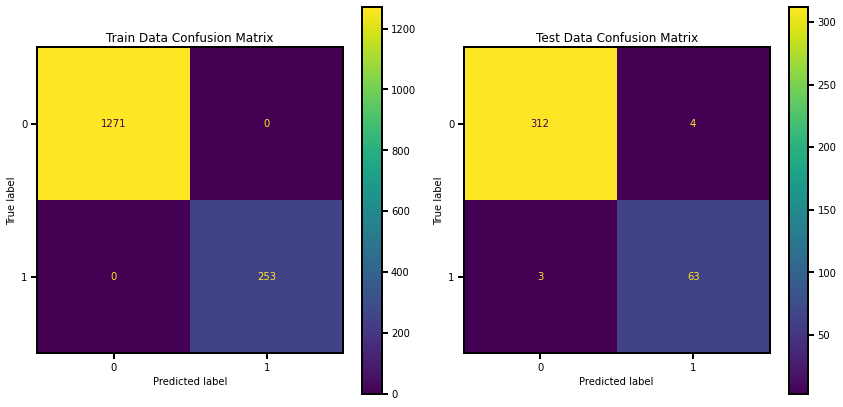

In [ ]:
########### Code #############

el_df = pd.read_csv("el_train.csv") # read data 

# Your code to featurize amino acids
X_el = []
y_el = []

lb = preprocessing.LabelBinarizer()
lb.fit(amino_acids)

for i, row in el_df.iterrows():   # iterate through each row in the df
  peptide = []
  for aa in row['Peptide']:     # iterate through each amino acid in the peptide sequence and append to peptide (list)
    peptide.append(aa)
  transf_peptide = lb.transform(peptide).tolist()  # label binarizer of amino acids

  peptide_vector = []
  for arr in transf_peptide:
    peptide_vector.extend(arr)

  X_el.append(peptide_vector)
  y_el.append(row['Eluted Ligand'])

X_el = np.asarray(X_el)
y_el = np.asarray(y_el)

# Train-test split
X_el_train, X_el_test, y_el_train, y_el_test = train_test_split(X_el, y_el, test_size=0.2)

# Fit model
mlp_clf = MLPClassifier(hidden_layer_sizes=(512, 256, 128), activation='relu', alpha=0.64, solver='adam', early_stopping=False).fit(X_el_train, y_el_train)

# Confusion Matrix
fig, [ax_train, ax_test] = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout()
    
ConfusionMatrixDisplay.from_estimator(mlp_clf, X_el_train, y_el_train, ax=ax_train)
ConfusionMatrixDisplay.from_estimator(mlp_clf, X_el_test, y_el_test, ax=ax_test)

ax_train.set_title('Train Data Confusion Matrix')
ax_test.set_title('Test Data Confusion Matrix')

plt.show()

########### Code #############

## <center> Problem 3: Accelerating Neural Networks with GPUs </center>

### 3.1 (2 points) Request a GPU on Google Colab

Run this cell as-is, with no modifications, to show that you successfully requested a GPU.

In [ ]:
# Check if your GPU is requested successfully or not 
assert torch.cuda.device_count() != 0

### 3.2 (10 points) Build Datasets and DataLoaders in PyTorch

Generate a validation set.

In [ ]:
########### Code #############
'''
Variable names: X_train, y_train; X_valid, y_valid; X_test, y_test
'''

X_train, X_valid, y_train, y_valid = train_test_split(X_all_train, y_all_train, test_size=0.1)

########### Code #############

A SequenceDataset class for you to construct your dataloaders.

In [ ]:
# Generate dataset
class SequenceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(np.array(X))  # store X as a pytorch Tensor
        self.y = torch.Tensor(np.array(y))  # store y as a pytorch Tensor
        self.len=len(self.X)                # number of samples in the data 

    def __getitem__(self, index):
        return self.X[index], self.y[index] # get the appropriate item

    def __len__(self):
        return self.len

Fill in the skeleton code to construct your Datasets and DataLoaders.

In [ ]:
########### Code #############

train_data = SequenceDataset(X_train, y_train)
val_data = SequenceDataset(X_valid, y_valid)
test_data = SequenceDataset(X_test, y_test)

batch_size = 256
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


########### Code #############

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(1090, 180)
(122, 180)
(246, 180)


Run this cell to check that your DataLoaders work as expected.

In [ ]:
########### Code #############
loaders = ['train_dataloader', 'val_dataloader', 'test_dataloader']

for i, loader in enumerate([train_dataloader, val_dataloader, test_dataloader]):
    print(f"Number of batches in {loaders[i]}:", len(loader))
    for index, batch in enumerate(loader): 
        # Your batch returns a X, y stacked in a batch 
        X_batch, y_batch = batch[0], batch[1]
        if index == 0:
            print(f"Shape of {loaders[i]} batch:", X_batch.shape)
            print()

'''
Each batch is size 256.
There are 7 total batches in the dataset.
'''

########### Code #############

Number of batches in train_dataloader: 5
Shape of train_dataloader batch: torch.Size([256, 180])

Number of batches in val_dataloader: 1
Shape of val_dataloader batch: torch.Size([122, 180])

Number of batches in test_dataloader: 1
Shape of test_dataloader batch: torch.Size([246, 180])



'\nEach batch is size 256.\nThere are 7 total batches in the dataset.\n'

### 3.3 (15 points) Define the MLP in PyTorch

Look at the following code snippet to understand how the linear layer works in PyTorch. Take careful note of the dimensions of the input and output.

In [ ]:
linear = torch.nn.Linear(2, 3)

input_tensor = torch.ones((4, 2))
output_tensor = linear(input_tensor)

print(input_tensor, output_tensor, input_tensor.shape, output_tensor.shape)

Look at the following code snippet to understand how the ReLU layer works in PyTorch (the Tanh layer is similar). Take careful note of the dimensions of the input and output.

In [ ]:
relu = torch.nn.ReLU()

input_tensor = torch.ones((4, 2))
output_tensor = relu(input_tensor)

print(input_tensor, output_tensor, input_tensor.shape, output_tensor.shape)

Look at the following code snippet to understand how to stack layers with the Sequential module.

In [ ]:
layer1 = torch.nn.Linear(2, 3)
layer2 = torch.nn.Linear(3, 4)

sequential = torch.nn.Sequential(layer1, layer2)

input_tensor = torch.ones((5, 2))
output_tensor = sequential(input_tensor)

print(input_tensor, output_tensor, input_tensor.shape, output_tensor.shape)

Build your MLP within the following torch.nn.Module object. Remember to use your hyperparameters from part 2.1.

In [ ]:
########### Code #############

class SequenceMLP(torch.nn.Module):
    def __init__(self):
        # You can modify this method to pass hyperparameters above, but this is not necessary
        # since we already have fixed hyperparameters
        super(SequenceMLP, self).__init__()
        
        # Implement your code here
        
        # fill in model here
        self.model = torch.nn.Sequential(
            torch.nn.Linear(180, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(), 
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(), 
            torch.nn.Linear(128, 1)
        )
        
    def forward(self, x):
        x = self.model(x)
        
        return x

########### Code #############

### 3.4 (10 points) Implement functions for training and testing

Define your model, device, and optimizer.

In [ ]:
########### Code #############

# device to train on
device = 'cuda:0'
# define your model
model = SequenceMLP().to(device)

# define your optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

########### Code #############

Implement your training and validation loops here.

In [ ]:
########### Code #############

def train(model, dataloader, optimizer, device):
    
    '''
    A function train on the entire dataset for one epoch .
    
    Args: 
        model (torch.nn.Module): your model from before 
        dataloader (torch.utils.data.DataLoader): DataLoader object for the train data
        optimizer (torch.optim.Optimizer(()): optimizer object to interface gradient calculation and optimization 
        device (str): Your device (usually 'cuda:0' for your GPU)
        
    Returns: 
        float: loss averaged over all the batches 
    
    '''

    epoch_loss = []
    model.train() # Set model to training mode 
    
    for batch in dataloader:    
        X, y = batch
        X = X.to(device)
        y = y.to(device)
        y = torch.unsqueeze(y, dim=1)
        
        # train your model on each batch here 
        y_pred = model(X)
        
        loss = torch.nn.functional.mse_loss(y, y_pred)   # fill in loss here
        epoch_loss.append(loss.item())
        
        # run backpropagation given the loss you defined
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return np.array(epoch_loss).mean()


def validate(model, dataloader, device):
    
    '''
    A function validate on the validation dataset for one epoch .
    
    Args: 
        model (torch.nn.Module): your model for before 
        dataloader (torch.utils.data.DataLoader): DataLoader object for the validation data
        device (str): Your device (usually 'cuda:0' for your GPU)
        
    Returns: 
        float: loss averaged over all the batches 
    
    '''
    
    val_loss = []
    model.eval() # Set model to evaluation mode 
    with torch.no_grad():    
        for batch in dataloader:
            X, y = batch
            X = X.to(device)
            y = y.to(device)
            y = torch.unsqueeze(y, dim=1)
            
            # validate your model on each batch here 
            y_pred = model(X)
            y_pred = torch.unsqueeze(y_pred, 0)

            loss = torch.nn.functional.mse_loss(y, y_pred)   # fill in loss here
            val_loss.append(loss.item())
            
    return np.array(val_loss).mean()

########### Code #############

Train and validate your model.

In [ ]:
print("epoch", "train loss", "validation loss")

val_loss_curve = []
train_loss_curve = []

for epoch in range(400):
    
    # Compute train your model on training data
    epoch_loss = train(model, train_dataloader, optimizer,  device=device)
    
    # Validate your on validation data 
    val_loss = validate(model, val_dataloader, device=device) 
    
    # Record train and loss performance 
    train_loss_curve.append(epoch_loss)
    val_loss_curve.append(val_loss)
    
    print(epoch, epoch_loss, val_loss)

epoch train loss validation loss
0 0.1499492943286896 0.12720903754234314
1 0.110269495844841 0.09548856317996979
2 0.08248677700757981 0.08950376510620117
3 0.0694632038474083 0.07276448607444763
4 0.059138116985559465 0.06182807683944702
5 0.04454020410776138 0.052095480263233185
6 0.03807882666587829 0.04623645171523094
7 0.026697195321321487 0.042414624243974686


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: Using a target size (torch.Size([1, 122, 1])) that is different to the input size (torch.Size([122, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


8 0.022602520138025283 0.04324377328157425
9 0.018434769287705422 0.04233280196785927
10 0.014029766619205474 0.04221716523170471
11 0.011315030977129936 0.0401192307472229
12 0.009718184173107148 0.038217660039663315
13 0.00705167418345809 0.03558565676212311
14 0.005083748791366816 0.034385811537504196
15 0.004166491236537695 0.03314603865146637
16 0.002987566962838173 0.0338142029941082
17 0.002401403104886413 0.03285432234406471
18 0.0017311471281573176 0.03387175127863884
19 0.0012585048330947756 0.03372726961970329
20 0.0009484972106292844 0.03408564254641533
21 0.0007792820455506444 0.03441042825579643
22 0.0006272978149354458 0.03459075838327408
23 0.0004753491375595331 0.034962307661771774
24 0.00040844723116606474 0.034961502999067307
25 0.0002845348499249667 0.03489392623305321
26 0.00023135730298236014 0.03522718325257301
27 0.0001947587530594319 0.035034261643886566
28 0.000236413576931227 0.03486473113298416
29 0.00014123061991995202 0.034756824374198914
30 0.000128762829

Plot your train and validation loss curves.

Text(0.5, 1.0, 'Loss Curves')

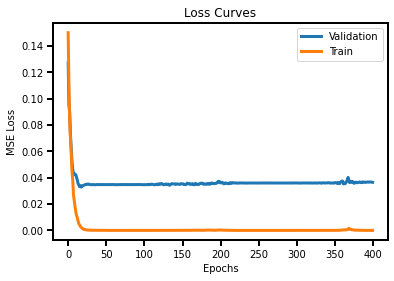

In [ ]:
plt.plot(val_loss_curve, label="Validation")
plt.plot(train_loss_curve, label="Train")
plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("Epochs")
plt.title('Loss Curves')

Compute your R^2 on the test set.

In [ ]:
########### Code #############

from sklearn.metrics import r2_score

# code to compute r^2 goes here
model.eval()
for batch in test_dataloader:
  X, y = batch
  X = X.to(device)
  y = y.to(device)

  # validate your model on each batch here 
  y_pred = model(X)
  y_pred = y_pred.detach().cpu().numpy()   # convert tensor to numpy
  y_true = y.detach().cpu().numpy()

r2_score(y_true, y_pred)

########### Code #############

0.7379777230935092